In [1301]:
import pandas as pd # to use or generate dataframe
import seaborn as sns # for pretty plots
import numpy as np # for matrix manipulation
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import geopandas as gpd
from shapely.geometry import Point

In [1303]:
pwd

'C:\\Users\\emper\\OneDrive\\Desktop\\DSTI\\Pratical-Intro-to-Data-Science\\Final-Project'

In [1305]:
%cd C:\\Users\\emper\\OneDrive\\Desktop\\DSTI\\Pratical-Intro-to-Data-Science\\Final-Project

C:\Users\emper\OneDrive\Desktop\DSTI\Pratical-Intro-to-Data-Science\Final-Project


In [1307]:
Classification_data = pd.read_csv("Classification_data.csv")

In [1309]:
!pip install geopanda


ERROR: Could not find a version that satisfies the requirement geopanda (from versions: none)
ERROR: No matching distribution found for geopanda


In [1310]:
#Let's Load weather station data
#Convert to GeoDataFrame and assign WGS84 CRS (EPSG:4326)
Classification_data['geometry'] = Classification_data.apply(lambda row: Point(row['lon'], row['lat']), axis=1)
Classification_data_gdf = gpd.GeoDataFrame(Classification_data, geometry='geometry')
Classification_data_gdf.set_crs(epsg=4326, inplace=True)

#Let's Load the shapefile for UK boundaries (adjust path as needed)
shapefile_path = "CTYUA_DEC_2024_UK_BFC.shp"  # make sure .shp, .shx, .dbf files are all present
boroughs = gpd.read_file(shapefile_path)

# Ensure shapefile has a CRS and reproject if needed
if boroughs.crs is None:
    boroughs.set_crs(epsg=27700, inplace=True)  # Typical CRS for UK shapefiles (British National Grid)

#Reproject boroughs to match weather station CRS
boroughs = boroughs.to_crs(epsg=4326)

#Let's Perform spatial join to map stations to boroughs
# You may need to adjust the name of the borough column depending on your shapefile
mapped_data = gpd.sjoin(Classification_data_gdf, boroughs, how="left", predicate='within')

#Let's check the result
print(mapped_data[['station', 'geometry', 'CTYUA24NM']].head())  

# Optionally save to file
#mapped_data.to_csv("classification_with_boroughs.csv", index=False)


     station             geometry   CTYUA24NM
0  aberporth  POINT (-4.57 52.14)  Ceredigion
1  aberporth  POINT (-4.57 52.14)  Ceredigion
2  aberporth  POINT (-4.57 52.14)  Ceredigion
3  aberporth  POINT (-4.57 52.14)  Ceredigion
4  aberporth  POINT (-4.57 52.14)  Ceredigion


In [1312]:
print(boroughs.columns)


Index(['CTYUA24CD', 'CTYUA24NM', 'CTYUA24NMW', 'BNG_E', 'BNG_N', 'LONG', 'LAT',
       'GlobalID', 'geometry'],
      dtype='object')


In [1313]:
mapped_data.head(100)

,year,month,tmax,tmin,af,rain,sun,station,lon,lat,...,geometry,index_right,CTYUA24CD,CTYUA24NM,CTYUA24NMW,BNG_E,BNG_N,LONG,LAT,GlobalID
0,1957,Jan,8.6,3.9,2.0,80.6,55.6,aberporth,-4.57,52.14,...,POINT (-4.57 52.14),202.0,W06000008,Ceredigion,Ceredigion,267127.0,268437.0,-3.94993,52.298,143d1212-cd4c-4605-9ff2-27470c0add3a
1,1957,Feb,8.5,3.2,2.0,85.1,105.2,aberporth,-4.57,52.14,...,POINT (-4.57 52.14),202.0,W06000008,Ceredigion,Ceredigion,267127.0,268437.0,-3.94993,52.298,143d1212-cd4c-4605-9ff2-27470c0add3a
2,1957,Mar,12.2,7.4,0.0,83.1,98.3,aberporth,-4.57,52.14,...,POINT (-4.57 52.14),202.0,W06000008,Ceredigion,Ceredigion,267127.0,268437.0,-3.94993,52.298,143d1212-cd4c-4605-9ff2-27470c0add3a
3,1957,Apr,11.3,6.2,0.0,7.4,181.1,aberporth,-4.57,52.14,...,POINT (-4.57 52.14),202.0,W06000008,Ceredigion,Ceredigion,267127.0,268437.0,-3.94993,52.298,143d1212-cd4c-4605-9ff2-27470c0add3a
4,1957,May,13.6,7.4,0.0,54.1,268.7,aberporth,-4.57,52.14,...,POINT (-4.57 52.14),202.0,W06000008,Ceredigion,Ceredigion,267127.0,268437.0,-3.94993,52.298,143d1212-cd4c-4605-9ff2-27470c0add3a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1964,Dec,7.8,2.4,5.0,144.3,49.1,aberporth,-4.57,52.14,...,POINT (-4.57 52.14),202.0,W06000008,Ceredigion,Ceredigion,267127.0,268437.0,-3.94993,52.298,143d1212-cd4c-4605-9ff2-27470c0add3a
96,1965,Jan,6.8,2.5,9.0,110.7,77.0,aberporth,-4.57,52.14,...,POINT (-4.57 52.14),202.0,W06000008,Ceredigion,Ceredigion,267127.0,268437.0,-3.94993,52.298,143d1212-cd4c-4605-9ff2-27470c0add3a
97,1965,Feb,5.6,1.4,8.0,13.0,57.1,aberporth,-4.57,52.14,...,POINT (-4.57 52.14),202.0,W06000008,Ceredigion,Ceredigion,267127.0,268437.0,-3.94993,52.298,143d1212-cd4c-4605-9ff2-27470c0add3a
98,1965,Mar,9.2,3.2,6.0,75.0,136.6,aberporth,-4.57,52.14,...,POINT (-4.57 52.14),202.0,W06000008,Ceredigion,Ceredigion,267127.0,268437.0,-3.94993,52.298,143d1212-cd4c-4605-9ff2-27470c0add3a


In [1314]:
# Step 1: Create geometry for stations
geometry = [Point(xy) for xy in zip(Classification_data['lon'], Classification_data['lat'])]
station_gdf = gpd.GeoDataFrame(Classification_data, geometry=geometry, crs="EPSG:4326")  # WGS84 (Lat/Lon)

# Step 2: Load shapefile
boroughs = gpd.read_file("CTYUA_DEC_2024_UK_BFC.shp")

# Step 3: Set CRS for boroughs if missing
if boroughs.crs is None:
    boroughs.set_crs(epsg=27700, inplace=True)  # British National Grid (commonly used in UK shapefiles)

# Step 4: Convert boroughs to WGS84 to match station_gdf
boroughs = boroughs.to_crs(epsg=4326)

# Step 5: Spatial join
joined = gpd.sjoin(station_gdf, boroughs[['CTYUA24NM', 'geometry']], how='left', predicate='intersects')

# Step 6: Save results
joined.to_csv("classification_with_boroughs.csv", index=False)


In [1318]:
# Drop any missing Lat or Lon values just in case
Classification_data = Classification_data.dropna(subset=['lat', 'lon'])

# Recreate the geometry
station_gdf = gpd.GeoDataFrame(
    Classification_data.copy(),
    geometry=[Point(xy) for xy in zip(Classification_data["lon"], Classification_data["lat"])],
    crs="EPSG:4326"  # WGS84 - GPS coordinate system
)


In [1319]:
boroughs = gpd.read_file("CTYUA_DEC_2024_UK_BFC.shp")

# Set CRS if missing
if boroughs.crs is None:
    boroughs.set_crs(epsg=27700, inplace=True)  # EPSG:27700 = British National Grid

# Transform to match the CRS of the station data
boroughs = boroughs.to_crs("EPSG:4326")


In [1320]:
joined = gpd.sjoin(
    station_gdf,
    boroughs[['CTYUA24NM', 'geometry']],
    how='left',
    predicate='intersects'
)


In [1321]:
print(joined[['station', 'lat', 'lon', 'CTYUA24NM']].head(100))


      station    lat   lon   CTYUA24NM
0   aberporth  52.14 -4.57  Ceredigion
1   aberporth  52.14 -4.57  Ceredigion
2   aberporth  52.14 -4.57  Ceredigion
3   aberporth  52.14 -4.57  Ceredigion
4   aberporth  52.14 -4.57  Ceredigion
..        ...    ...   ...         ...
95  aberporth  52.14 -4.57  Ceredigion
96  aberporth  52.14 -4.57  Ceredigion
97  aberporth  52.14 -4.57  Ceredigion
98  aberporth  52.14 -4.57  Ceredigion
99  aberporth  52.14 -4.57  Ceredigion

[100 rows x 4 columns]


**This is not given the borough name, so let's try the original data**

In [1323]:
# Load the raw data
df = pd.read_csv("all_stations_combined.csv")

# Check the first few rows
print(df.head())


   year  month  tmax  tmin  af  rain  sun    station Sun Data Source AveTemp
0  1941      1   NaN   NaN NaN  74.7  NaN  aberporth         Missing       0
1  1941      2   NaN   NaN NaN  69.1  NaN  aberporth         Missing       0
2  1941      3   NaN   NaN NaN  76.2  NaN  aberporth         Missing       0
3  1941      4   NaN   NaN NaN  33.7  NaN  aberporth         Missing       0
4  1941      5   NaN   NaN NaN  51.3  NaN  aberporth         Missing       0


In [1324]:
# Load the Excel file
station_info = pd.read_excel("Weather Station Overview.xlsx")

# Display column names to verify structure
print(station_info.columns)


Index(['Name', 'Location', 'Opened', 'Data', 'Longitude', 'Longitude.1'], dtype='object')


In [1325]:
# Show the first few rows to inspect the data structure
print(station_info.head(10))


                  Name        Location  Opened       Data  Longitude  \
0            Aberporth   -4.57, 52.139    1941  View data     -4.570   
1               Armagh  -6.649, 54.352    1853  View data     -6.640   
2  Ballypatrick Forest  -6.153, 55.181    1961  View data     -6.150   
3             Bradford  -1.772, 53.813    1908  View data     -1.770   
4         Braemar No 2  -3.396, 57.011    1959  View data     -3.390   
5             Camborne  -5.327, 50.218    1978  View data     -5.320   
6       Cambridge Niab   0.102, 52.245    1959  View data      0.102   
7    Cardiff Bute Park  -3.187, 51.488    1977  View data     -3.180   
8             Chivenor  -4.147, 51.089    1951  View data     -4.140   
9           Cwmystwyth  -3.802, 52.358    1959  View data     -3.800   

  Longitude.1  
0      52.139  
1      54.352  
2      55.181  
3      53.813  
4      57.011  
5      50.218  
6      52.245  
7      51.488  
8      51.089  
9      52.358  


In [1326]:
# Extract and rename station coordinates
station_coords = station_info[['Name', 'Longitude', 'Longitude.1']].copy()
station_coords.columns = ['station', 'Lon', 'Lat']

# Preview the cleaned data
print(station_coords.head())


               station   Lon     Lat
0            Aberporth -4.57  52.139
1               Armagh -6.64  54.352
2  Ballypatrick Forest -6.15  55.181
3             Bradford -1.77  53.813
4         Braemar No 2 -3.39  57.011


**Now, let's merge and clean**

In [1328]:
# Load weather data
weather_data = pd.read_csv("all_stations_combined.csv")

# Load and clean station coordinates
station_coords = station_info[['Name', 'Longitude', 'Longitude.1']].copy()
station_coords.columns = ['station', 'Lon', 'Lat']

# Standardize station name format (just in case)
weather_data['station'] = weather_data['station'].str.strip().str.lower()
station_coords['station'] = station_coords['station'].str.strip().str.lower()

# Merge the coordinates into the weather data
merged_data = pd.merge(weather_data, station_coords, on='station', how='left')

# Select and reorder final columns
final_data = merged_data[['year', 'month', 'tmax', 'tmin', 'af', 'rain', 'sun', 'station', 'Lat', 'Lon']]

# Preview
print(final_data.head())


   year  month  tmax  tmin  af  rain  sun    station     Lat   Lon
0  1941      1   NaN   NaN NaN  74.7  NaN  aberporth  52.139 -4.57
1  1941      2   NaN   NaN NaN  69.1  NaN  aberporth  52.139 -4.57
2  1941      3   NaN   NaN NaN  76.2  NaN  aberporth  52.139 -4.57
3  1941      4   NaN   NaN NaN  33.7  NaN  aberporth  52.139 -4.57
4  1941      5   NaN   NaN NaN  51.3  NaN  aberporth  52.139 -4.57


In [1329]:
# Reload the weather data (raw + station names)
weather_with_coords = pd.read_csv("all_stations_combined.csv")
station_info = pd.read_excel("Weather Station Overview.xlsx")

# Extract and clean station coordinates
station_coords = station_info[['Name', 'Longitude', 'Longitude.1']].copy()
station_coords.columns = ['station', 'Lon', 'Lat']

# Convert coordinates to numeric
station_coords['Lat'] = pd.to_numeric(station_coords['Lat'], errors='coerce')
station_coords['Lon'] = pd.to_numeric(station_coords['Lon'], errors='coerce')

# Standardize station names
weather_with_coords['station'] = weather_with_coords['station'].str.strip().str.lower()
station_coords['station'] = station_coords['station'].str.strip().str.lower()

# Merge weather data with coordinates
merged = pd.merge(weather_with_coords, station_coords, on='station', how='left')
merged = merged.dropna(subset=['Lat', 'Lon'])  # Remove any with missing coordinates

# Preview
print(merged[['station', 'year', 'month', 'Lat', 'Lon']].head())


     station  year  month     Lat   Lon
0  aberporth  1941      1  52.139 -4.57
1  aberporth  1941      2  52.139 -4.57
2  aberporth  1941      3  52.139 -4.57
3  aberporth  1941      4  52.139 -4.57
4  aberporth  1941      5  52.139 -4.57


In [1330]:
# Define the path to the shapefile (include .shp file name)
shapefile_path = r"C:\Users\emper\OneDrive\Desktop\DSTI\Pratical-Intro-to-Data-Science\Final-Project"

# Load the borough polygons shapefile into a GeoDataFrame
boroughs = gpd.read_file(shapefile_path)
print("Borough CRS:", boroughs.crs)  # Check current CRS of the shapefile


Borough CRS: EPSG:27700


In [1331]:
# If CRS is not defined, set it to EPSG:27700 (British National Grid)
if boroughs.crs is None:
    boroughs.set_crs(epsg=27700, inplace=True)


In [1332]:
# Reproject the borough GeoDataFrame to WGS84 (EPSG:4326) to match lat/lon coordinates
boroughs = boroughs.to_crs(epsg=4326)
print("Borough CRS after reprojection:", boroughs.crs)


Borough CRS after reprojection: EPSG:4326


In [1333]:
# Example: merged is an existing DataFrame with 'Lat', 'Lon', 'station' columns.
# Convert merged DataFrame to a GeoDataFrame with a geometry column (points)
stations_gdf = gpd.GeoDataFrame(
    merged, 
    geometry=gpd.points_from_xy(merged['Lon'], merged['Lat']), 
    crs="EPSG:4326"
)
print(stations_gdf.head(3))  # Preview first few stations with geometry


   year  month  tmax  tmin  af  rain  sun    station Sun Data Source AveTemp  \
0  1941      1   NaN   NaN NaN  74.7  NaN  aberporth         Missing       0   
1  1941      2   NaN   NaN NaN  69.1  NaN  aberporth         Missing       0   
2  1941      3   NaN   NaN NaN  76.2  NaN  aberporth         Missing       0   

    Lon     Lat              geometry  
0 -4.57  52.139  POINT (-4.57 52.139)  
1 -4.57  52.139  POINT (-4.57 52.139)  
2 -4.57  52.139  POINT (-4.57 52.139)  


In [1334]:
# Spatially join the station points with borough polygons to get borough info for each station
stations_with_borough = gpd.sjoin(stations_gdf, boroughs, how="left", predicate="intersects")

# (Optional) Drop unnecessary index columns added by sjoin
stations_with_borough = stations_with_borough.drop(columns=["index_right"])

# Replace 'NAME' below with the actual borough name column
stations_with_borough.rename(columns={"CTYUA24NM": "Borough"}, inplace=True)

# Select relevant columns for output
result = stations_with_borough[["station", "Lat", "Lon", "Borough"]]


In [1335]:
# Save the stations with borough names to a CSV file (geometry is omitted in CSV)
#result.to_csv("stations_with_borough.csv", index=False)

# Preview the first few entries of the result
#print(result.head())


In [1336]:
# Reload the weather and station data
weather_data = pd.read_csv("all_stations_combined.csv")
station_info = pd.read_excel("Weather Station Overview.xlsx")

# Extract and clean station coordinates
station_coords = station_info[['Name', 'Longitude', 'Longitude.1']].copy()
station_coords.columns = ['station', 'Lon', 'Lat']
station_coords['Lat'] = pd.to_numeric(station_coords['Lat'], errors='coerce')
station_coords['Lon'] = pd.to_numeric(station_coords['Lon'], errors='coerce')
station_coords['station'] = station_coords['station'].str.strip().str.lower()
weather_data['station'] = weather_data['station'].str.strip().str.lower()

# Merge coordinates with weather data
merged = pd.merge(weather_data, station_coords, on='station', how='left')
merged = merged.dropna(subset=['Lat', 'Lon'])

# Convert to GeoDataFrame
geometry = [Point(xy) for xy in zip(merged['Lon'], merged['Lat'])]
stations_gdf = gpd.GeoDataFrame(merged, geometry=geometry, crs="EPSG:4326")

# Load shapefile (boroughs) - re-uploaded files expected
shapefile_path = "CTYUA_DEC_2024_UK_BFC.shp"
boroughs = gpd.read_file(shapefile_path)
if boroughs.crs is None:
    boroughs.set_crs(epsg=27700, inplace=True)
boroughs = boroughs.to_crs("EPSG:4326")

# Spatial join
stations_with_borough = gpd.sjoin(stations_gdf, boroughs, how="left", predicate="intersects")


In [1359]:
stations_with_borough.head()

,year,month,tmax,tmin,af,rain,sun,station,Sun Data Source,AveTemp,...,geometry,index_right,CTYUA24CD,CTYUA24NM,CTYUA24NMW,BNG_E,BNG_N,LONG,LAT,GlobalID
0,1941,1,NaN,NaN,NaN,74.7,NaN,aberporth,Missing,0,...,POINT (-4.57 52.139),202.0,W06000008,Ceredigion,Ceredigion,267127.0,268437.0,-3.94993,52.298,143d1212-cd4c-4605-9ff2-27470c0add3a
1,1941,2,NaN,NaN,NaN,69.1,NaN,aberporth,Missing,0,...,POINT (-4.57 52.139),202.0,W06000008,Ceredigion,Ceredigion,267127.0,268437.0,-3.94993,52.298,143d1212-cd4c-4605-9ff2-27470c0add3a
2,1941,3,NaN,NaN,NaN,76.2,NaN,aberporth,Missing,0,...,POINT (-4.57 52.139),202.0,W06000008,Ceredigion,Ceredigion,267127.0,268437.0,-3.94993,52.298,143d1212-cd4c-4605-9ff2-27470c0add3a
3,1941,4,NaN,NaN,NaN,33.7,NaN,aberporth,Missing,0,...,POINT (-4.57 52.139),202.0,W06000008,Ceredigion,Ceredigion,267127.0,268437.0,-3.94993,52.298,143d1212-cd4c-4605-9ff2-27470c0add3a
4,1941,5,NaN,NaN,NaN,51.3,NaN,aberporth,Missing,0,...,POINT (-4.57 52.139),202.0,W06000008,Ceredigion,Ceredigion,267127.0,268437.0,-3.94993,52.298,143d1212-cd4c-4605-9ff2-27470c0add3a


In [1366]:
stations_with_borough.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 25198 entries, 0 to 39182
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   year             25198 non-null  int64   
 1   month            25198 non-null  int64   
 2   tmax             24426 non-null  float64 
 3   tmin             24454 non-null  float64 
 4   af               23446 non-null  float64 
 5   rain             24864 non-null  float64 
 6   sun              20286 non-null  object  
 7   station          25198 non-null  object  
 8   Sun Data Source  25198 non-null  object  
 9   AveTemp          25198 non-null  object  
 10  Lon              25198 non-null  float64 
 11  Lat              25198 non-null  float64 
 12  geometry         25198 non-null  geometry
 13  index_right      23788 non-null  float64 
 14  CTYUA24CD        23788 non-null  object  
 15  CTYUA24NM        23788 non-null  object  
 16  CTYUA24NMW       2731 non-null   obje

In [1368]:
stations_with_borough.isna().sum()

year                   0
month                  0
tmax                 772
tmin                 744
af                  1752
rain                 334
sun                 4912
station                0
Sun Data Source        0
AveTemp                0
Lon                    0
Lat                    0
geometry               0
index_right         1410
CTYUA24CD           1410
CTYUA24NM           1410
CTYUA24NMW         22467
BNG_E               1410
BNG_N               1410
LONG                1410
LAT                 1410
GlobalID            1410
dtype: int64

In [1370]:
#Delete column named 'AveTemp'
#stations_with_borough = stations_with_borough.drop(columns=['AveTemp'])


In [1372]:
stations_with_borough.head()

,year,month,tmax,tmin,af,rain,sun,station,Sun Data Source,AveTemp,...,geometry,index_right,CTYUA24CD,CTYUA24NM,CTYUA24NMW,BNG_E,BNG_N,LONG,LAT,GlobalID
0,1941,1,NaN,NaN,NaN,74.7,NaN,aberporth,Missing,0,...,POINT (-4.57 52.139),202.0,W06000008,Ceredigion,Ceredigion,267127.0,268437.0,-3.94993,52.298,143d1212-cd4c-4605-9ff2-27470c0add3a
1,1941,2,NaN,NaN,NaN,69.1,NaN,aberporth,Missing,0,...,POINT (-4.57 52.139),202.0,W06000008,Ceredigion,Ceredigion,267127.0,268437.0,-3.94993,52.298,143d1212-cd4c-4605-9ff2-27470c0add3a
2,1941,3,NaN,NaN,NaN,76.2,NaN,aberporth,Missing,0,...,POINT (-4.57 52.139),202.0,W06000008,Ceredigion,Ceredigion,267127.0,268437.0,-3.94993,52.298,143d1212-cd4c-4605-9ff2-27470c0add3a
3,1941,4,NaN,NaN,NaN,33.7,NaN,aberporth,Missing,0,...,POINT (-4.57 52.139),202.0,W06000008,Ceredigion,Ceredigion,267127.0,268437.0,-3.94993,52.298,143d1212-cd4c-4605-9ff2-27470c0add3a
4,1941,5,NaN,NaN,NaN,51.3,NaN,aberporth,Missing,0,...,POINT (-4.57 52.139),202.0,W06000008,Ceredigion,Ceredigion,267127.0,268437.0,-3.94993,52.298,143d1212-cd4c-4605-9ff2-27470c0add3a


**Let's Save the data**

In [1375]:
# Save DataFrame to CSV
#stations_with_borough.to_csv("stations_with_borough.csv", index=False)


**Let's save it as Happiness_Data for the purpose of Question 3**

In [1378]:
# Step 1: Load the CSV file
#file_path = r"C:\Users\emper\OneDrive\Desktop\DSTI\Pratical-Intro-to-Data-Science\Final-Project\stations_with_borough.csv"
happiness = pd.read_csv('stations_with_borough.csv')

In [1380]:
happiness.head()

,year,month,tmax,tmin,af,rain,sun,station,Sun Data Source,AveTemp,...,geometry,index_right,CTYUA24CD,CTYUA24NM,CTYUA24NMW,BNG_E,BNG_N,LONG,LAT,GlobalID
0,1941,1,NaN,NaN,NaN,74.7,NaN,aberporth,Missing,0,...,POINT (-4.57 52.139),202.0,W06000008,Ceredigion,Ceredigion,267127.0,268437.0,-3.94993,52.298,143d1212-cd4c-4605-9ff2-27470c0add3a
1,1941,2,NaN,NaN,NaN,69.1,NaN,aberporth,Missing,0,...,POINT (-4.57 52.139),202.0,W06000008,Ceredigion,Ceredigion,267127.0,268437.0,-3.94993,52.298,143d1212-cd4c-4605-9ff2-27470c0add3a
2,1941,3,NaN,NaN,NaN,76.2,NaN,aberporth,Missing,0,...,POINT (-4.57 52.139),202.0,W06000008,Ceredigion,Ceredigion,267127.0,268437.0,-3.94993,52.298,143d1212-cd4c-4605-9ff2-27470c0add3a
3,1941,4,NaN,NaN,NaN,33.7,NaN,aberporth,Missing,0,...,POINT (-4.57 52.139),202.0,W06000008,Ceredigion,Ceredigion,267127.0,268437.0,-3.94993,52.298,143d1212-cd4c-4605-9ff2-27470c0add3a
4,1941,5,NaN,NaN,NaN,51.3,NaN,aberporth,Missing,0,...,POINT (-4.57 52.139),202.0,W06000008,Ceredigion,Ceredigion,267127.0,268437.0,-3.94993,52.298,143d1212-cd4c-4605-9ff2-27470c0add3a


In [1382]:
#Let's check the number of unique borough
{col: happiness[col].nunique() for col in happiness.select_dtypes(include=['category', 'object']).columns}

{'sun': 3015,
 'station': 24,
 'Sun Data Source': 3,
 'AveTemp': 476,
 'geometry': 24,
 'CTYUA24CD': 21,
 'CTYUA24NM': 21,
 'CTYUA24NMW': 2,
 'GlobalID': 21}

In [1384]:
# Step 2: Check the name of the borough column (adjust if different)
print(happiness.columns)  # Preview column names to confirm

Index(['year', 'month', 'tmax', 'tmin', 'af', 'rain', 'sun', 'station',
       'Sun Data Source', 'AveTemp', 'Lon', 'Lat', 'geometry', 'index_right',
       'CTYUA24CD', 'CTYUA24NM', 'CTYUA24NMW', 'BNG_E', 'BNG_N', 'LONG', 'LAT',
       'GlobalID'],
      dtype='object')


In [1386]:
# Step 2: Convert relevant columns to numeric (if not already)
cols_to_convert = ['tmax', 'tmin', 'af', 'rain', 'sun']
for col in cols_to_convert:
    happiness[col] = pd.to_numeric(happiness[col], errors='coerce')

In [1388]:
# Step 3: Group by borough and calculate mean of weather columns
grouped_happiness = happiness.groupby('CTYUA24NM').agg({
    'tmax': 'mean',
    'tmin': 'mean',
    'af': 'mean',
    'rain': 'mean',
    'sun': 'mean'
}).reset_index()

In [1390]:
# Step 4: Preview the result
print(grouped_happiness.head())

                              CTYUA24NM       tmax      tmin        af  \
0  Armagh City, Banbridge and Craigavon  12.979003  5.695801  3.275591   
1   Bournemouth, Christchurch and Poole  14.671393  5.957836  4.907960   
2                              Bradford  12.347289  5.756471  3.728850   
3                            Ceredigion  12.182145  6.366919  3.038489   
4                              Cornwall  13.521507  8.451838  0.733456   

         rain         sun  
0   68.913213  104.269217  
1   70.251119  140.587595  
2   72.988864  104.586547  
3  103.427238  116.936573  
4   90.062316  134.119367  


In [1392]:
# Optional: Save the grouped result
#grouped_happiness.to_csv(r"C:\Users\emper\OneDrive\Desktop\DSTI\Pratical-Intro-to-Data-Science\Final-Project\grouped_by_borough.csv", index=False)

In [1394]:
happiness_by_borough = pd.read_csv('happiness_grouped_by_borough.csv')

In [1396]:
happiness_by_borough['AvgTemp'] = (happiness_by_borough['tmax'] + happiness_by_borough['tmin'])/2

In [1398]:
happiness_by_borough.head(23)

,CTYUA24NM,tmax,tmin,af,rain,sun,happiness,AvgTemp
0,"Armagh City, Banbridge and Craigavon",12.979003,5.695801,3.275591,68.913213,104.269217,8.04,9.337402
1,"Bournemouth, Christchurch and Poole",14.671393,5.957836,4.907960,70.251119,140.587595,7.49,10.314614
2,Bradford,12.347288,5.756471,3.728850,72.988864,104.586547,7.47,9.051880
3,Ceredigion,12.182145,6.366919,3.038489,103.427238,116.936573,7.61,9.274532
4,Cornwall,13.521507,8.451838,0.733456,90.062316,134.119367,7.48,10.986673
5,County Durham,12.435495,4.900232,4.740591,54.619097,111.454594,7.37,8.667863
6,Devon,14.621257,7.932528,1.703620,75.065769,138.594142,7.70,11.276892
7,Dumfries and Galloway,10.979394,3.471591,7.170238,135.456268,97.321491,7.81,7.225492
8,Fife,12.350498,5.028483,4.904229,57.455597,123.748259,7.40,8.689490
9,Hillingdon,15.001754,7.148136,2.912222,50.742325,128.976990,7.31,11.074945


In [1400]:
key_columns = ['tmax', 'tmin', 'AvgTemp', 'af', 'rain', 'sun', 'happiness']

In [1402]:
happiness_by_borough[key_columns]

,tmax,tmin,AvgTemp,af,rain,sun,happiness
0,12.979003,5.695801,9.337402,3.275591,68.913213,104.269217,8.04
1,14.671393,5.957836,10.314614,4.907960,70.251119,140.587595,7.49
2,12.347288,5.756471,9.051880,3.728850,72.988864,104.586547,7.47
3,12.182145,6.366919,9.274532,3.038489,103.427238,116.936573,7.61
4,13.521507,8.451838,10.986673,0.733456,90.062316,134.119367,7.48
5,12.435495,4.900232,8.667863,4.740591,54.619097,111.454594,7.37
6,14.621257,7.932528,11.276892,1.703620,75.065769,138.594142,7.70
7,10.979394,3.471591,7.225492,7.170238,135.456268,97.321491,7.81
8,12.350498,5.028483,8.689490,4.904229,57.455597,123.748259,7.40
9,15.001754,7.148136,11.074945,2.912222,50.742325,128.976990,7.31


**Let's standardise the score**

In [1405]:
scaler = StandardScaler()

In [1407]:
happiness_by_borough = scaler.fit_transform(happiness_by_borough[key_columns])
happiness_by_borough

array([[-6.46640682e-02, -4.20912674e-01, -2.58087989e-01,
        -1.39508039e-01, -1.24404092e-01, -1.10085046e+00,
         2.65862913e+00],
       [ 1.29463711e+00, -1.80054004e-01,  6.78736175e-01,
         1.04485666e+00, -6.26590220e-02,  1.27636151e+00,
        -3.45985983e-01],
       [-5.72046847e-01, -3.65144936e-01, -5.31808843e-01,
         1.89354286e-01,  6.36893241e-02, -1.08007971e+00,
        -4.55244714e-01],
       [-7.04687371e-01,  1.95968915e-01, -3.18358967e-01,
        -3.11536946e-01,  1.46843605e+00, -2.71711279e-01,
         3.09566406e-01],
       [ 3.71067141e-01,  2.11239329e+00,  1.32301804e+00,
        -1.98395214e+00,  8.51637974e-01,  8.52984986e-01,
        -4.00615349e-01],
       [-5.01200719e-01, -1.15218694e+00, -8.99953868e-01,
         9.23421778e-01, -7.84084945e-01, -6.30533099e-01,
        -1.00153837e+00],
       [ 1.25436859e+00,  1.63505148e+00,  1.60124273e+00,
        -1.28005028e+00,  1.59539562e-01,  1.14588049e+00,
         8.0123069

In [1411]:
# Assuming the scaled array is _means_data
# and you want to use the same column names as the original DataFrame
#scaled_happiness_by_borough.columns = key_columns
scaled_happiness_by_borough = pd.DataFrame(happiness_by_borough, columns=key_columns)
scaled_happiness_by_borough

,tmax,tmin,AvgTemp,af,rain,sun,happiness
0,-0.064664,-0.420913,-0.258088,-0.139508,-0.124404,-1.100850,2.658629
1,1.294637,-0.180054,0.678736,1.044857,-0.062659,1.276362,-0.345986
2,-0.572047,-0.365145,-0.531809,0.189354,0.063689,-1.080080,-0.455245
3,-0.704687,0.195969,-0.318359,-0.311537,1.468436,-0.271711,0.309566
4,0.371067,2.112393,1.323018,-1.983952,0.851638,0.852985,-0.400615
5,-0.501201,-1.152187,-0.899954,0.923422,-0.784085,-0.630533,-1.001538
6,1.254369,1.635051,1.601243,-1.280050,0.159540,1.145880,0.801231
7,-1.670718,-2.465371,-2.282711,2.686251,2.946592,-1.555612,1.402154
8,-0.569469,-1.034301,-0.879221,1.042149,-0.653179,0.174146,-0.837650
9,1.559978,0.914051,1.407642,-0.403150,-0.963000,0.516392,-1.329315


**Let's save the file**

In [1413]:
# Save the DataFrame as a CSV file in the current working directory
#scaled_happiness_by_borough.to_csv("scaled_happiness_by_borough.csv", index=False)

#print("File saved as scaled_happiness_by_borough.csv in the current working directory.")

File saved as scaled_happiness_by_borough.csv in the current working directory.


**Let's plot the boxplot**

In [1417]:
scaled_happiness_by_borough=pd.read_csv('scaled_happiness_by_borough.csv')
scaled_happiness_by_borough

,tmax,tmin,AvgTemp,af,rain,sun,happiness
0,-0.064664,-0.420913,-0.258088,-0.139508,-0.124404,-1.100850,2.658629
1,1.294637,-0.180054,0.678736,1.044857,-0.062659,1.276362,-0.345986
2,-0.572047,-0.365145,-0.531809,0.189354,0.063689,-1.080080,-0.455245
3,-0.704687,0.195969,-0.318359,-0.311537,1.468436,-0.271711,0.309566
4,0.371067,2.112393,1.323018,-1.983952,0.851638,0.852985,-0.400615
5,-0.501201,-1.152187,-0.899954,0.923422,-0.784085,-0.630533,-1.001538
6,1.254369,1.635051,1.601243,-1.280050,0.159540,1.145880,0.801231
7,-1.670718,-2.465371,-2.282711,2.686251,2.946592,-1.555612,1.402154
8,-0.569469,-1.034301,-0.879221,1.042149,-0.653179,0.174146,-0.837650
9,1.559978,0.914051,1.407642,-0.403150,-0.963000,0.516392,-1.329315


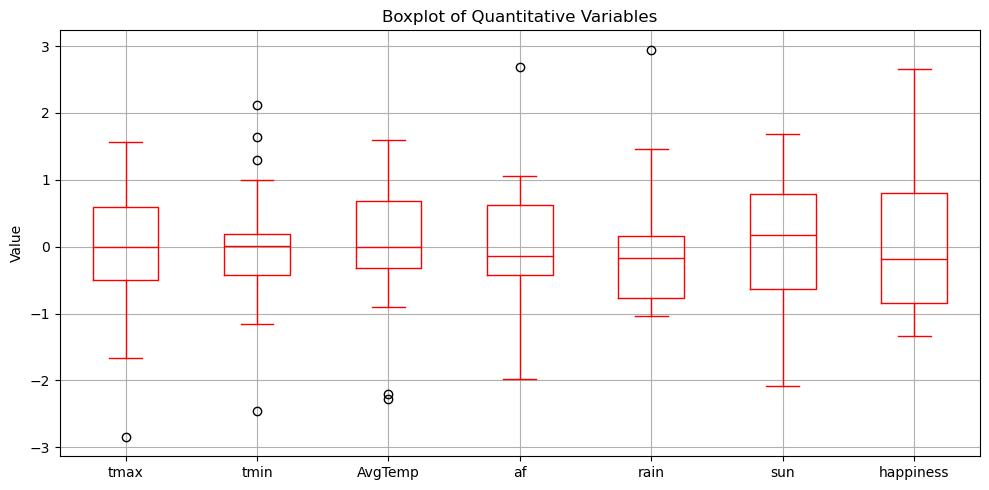

In [1419]:
#key_columns = ['tmax', 'tmin', 'AvgTemp', 'af', 'rain', 'sun', 'happiness']
plt.figure(figsize=(10, 5))
scaled_happiness_by_borough.boxplot(column=key_columns, color='red')
plt.title("Boxplot of Quantitative Variables")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()

array([[<Axes: xlabel='tmax', ylabel='tmax'>,
        <Axes: xlabel='tmin', ylabel='tmax'>,
        <Axes: xlabel='AvgTemp', ylabel='tmax'>,
        <Axes: xlabel='af', ylabel='tmax'>,
        <Axes: xlabel='rain', ylabel='tmax'>,
        <Axes: xlabel='sun', ylabel='tmax'>,
        <Axes: xlabel='happiness', ylabel='tmax'>],
       [<Axes: xlabel='tmax', ylabel='tmin'>,
        <Axes: xlabel='tmin', ylabel='tmin'>,
        <Axes: xlabel='AvgTemp', ylabel='tmin'>,
        <Axes: xlabel='af', ylabel='tmin'>,
        <Axes: xlabel='rain', ylabel='tmin'>,
        <Axes: xlabel='sun', ylabel='tmin'>,
        <Axes: xlabel='happiness', ylabel='tmin'>],
       [<Axes: xlabel='tmax', ylabel='AvgTemp'>,
        <Axes: xlabel='tmin', ylabel='AvgTemp'>,
        <Axes: xlabel='AvgTemp', ylabel='AvgTemp'>,
        <Axes: xlabel='af', ylabel='AvgTemp'>,
        <Axes: xlabel='rain', ylabel='AvgTemp'>,
        <Axes: xlabel='sun', ylabel='AvgTemp'>,
        <Axes: xlabel='happiness', ylabel='AvgTemp

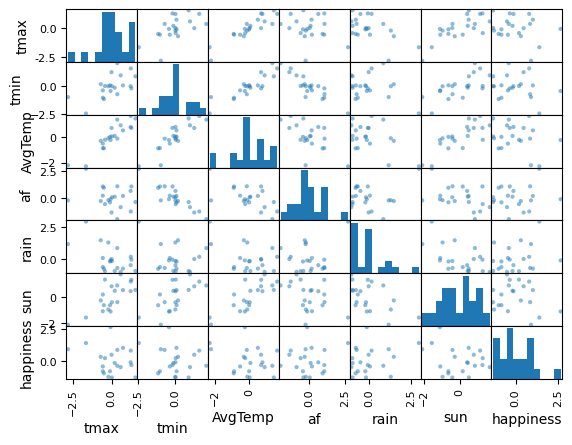

In [1421]:
pd.plotting.scatter_matrix(scaled_happiness_by_borough)

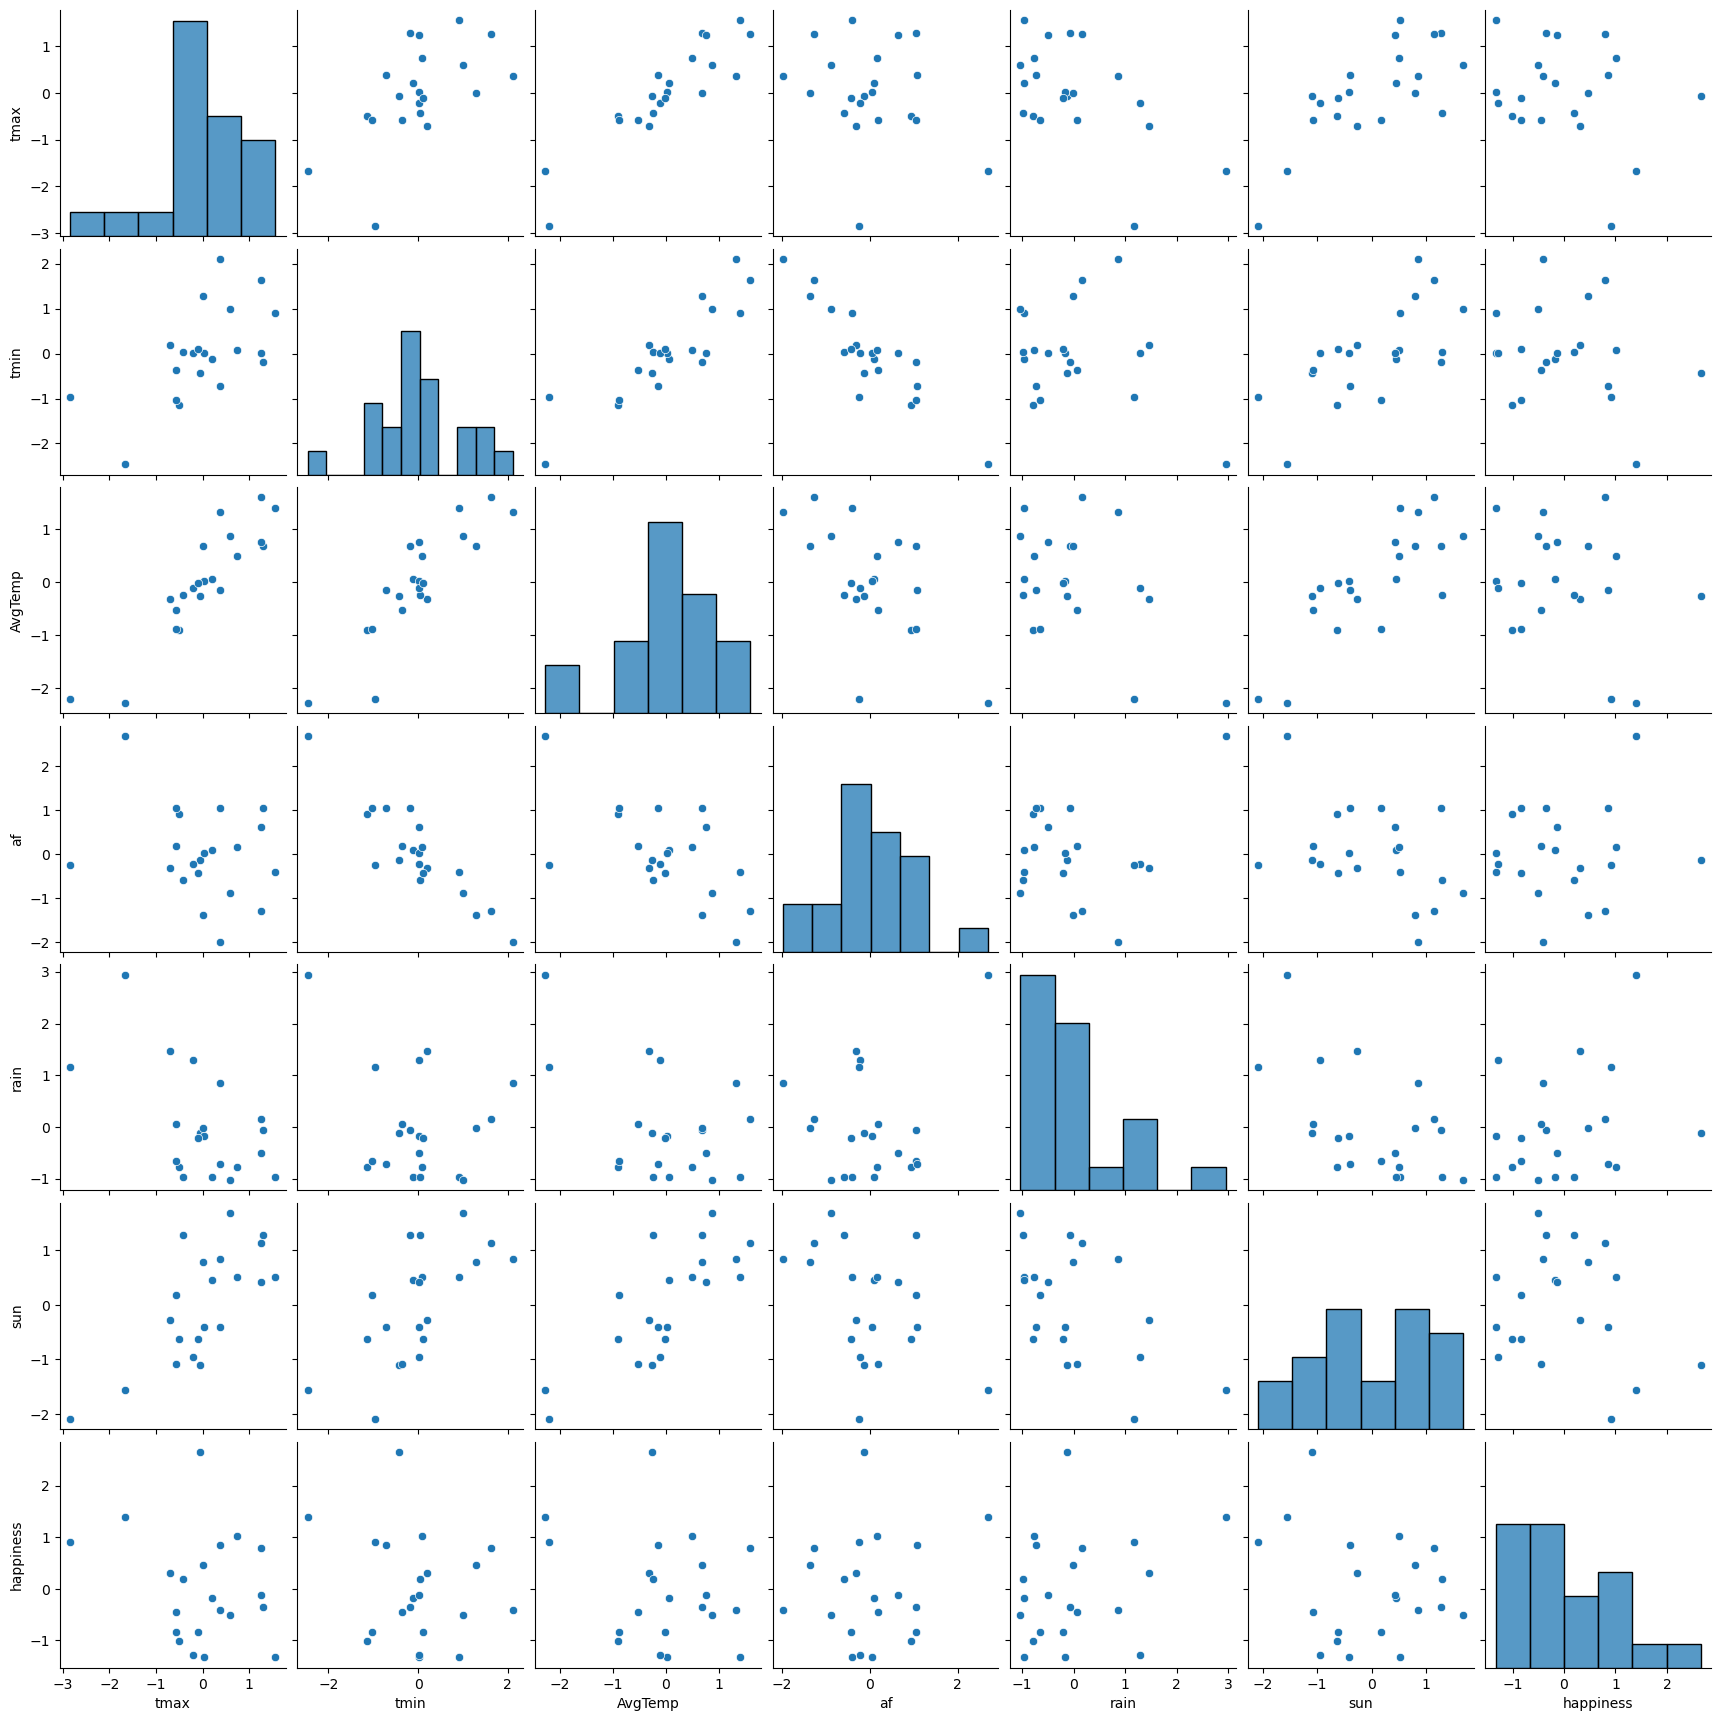

In [1423]:
sns.pairplot(scaled_happiness_by_borough)

**To make it clearer, let's plot the heatmap**

<Axes: >

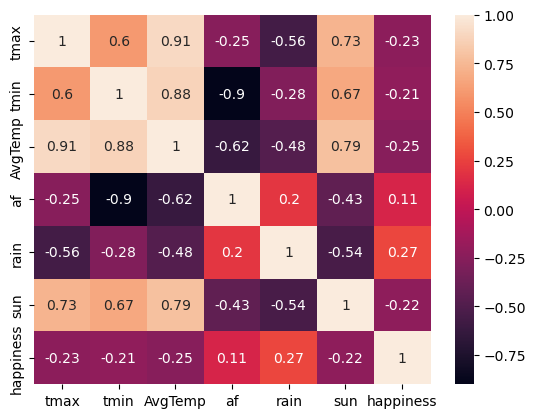

In [1425]:
correlation = scaled_happiness_by_borough.corr().round(2)
sns.heatmap(correlation, annot = True)

since average temperature and rain has best and second best correlation indices of 0.27 and -0.25, let's set them as x and happinness as y

In [1429]:
x = scaled_happiness_by_borough[['rain', 'AvgTemp']]
x

,rain,AvgTemp
0,-0.124404,-0.258088
1,-0.062659,0.678736
2,0.063689,-0.531809
3,1.468436,-0.318359
4,0.851638,1.323018
5,-0.784085,-0.899954
6,0.159540,1.601243
7,2.946592,-2.282711
8,-0.653179,-0.879221
9,-0.963000,1.407642


In [1431]:
y = scaled_happiness_by_borough[['happiness']]
y

,happiness
0,2.658629
1,-0.345986
2,-0.455245
3,0.309566
4,-0.400615
5,-1.001538
6,0.801231
7,1.402154
8,-0.837650
9,-1.329315


**Now Let's build the model**

In [1434]:
from sklearn.linear_model import LinearRegression 

In [1436]:
reg_model =LinearRegression().fit(x,y)

In [1438]:
reg_model.coef_

array([[ 0.19227964, -0.15766178]])

In [1440]:
reg_model.intercept_

array([-1.9013008e-15])

**Let's get the predicted y**

In [1443]:
y_predicted = reg_model.predict(x)
print(y_predicted)

[[ 0.01677024]
 [-0.1190588 ]
 [ 0.09609209]
 [ 0.3325434 ]
 [-0.04483673]
 [-0.00887525]
 [-0.22177856]
 [ 0.92646598]
 [ 0.01302652]
 [-0.40709665]
 [-0.10918597]
 [-0.33679353]
 [-0.19439746]
 [-0.03641795]
 [-0.15066628]
 [-0.22546677]
 [ 0.2673584 ]
 [-0.0387042 ]
 [ 0.5721088 ]
 [-0.11603892]
 [-0.21504836]]


**Let's Find the MSE**

In [1445]:
from sklearn.metrics import mean_squared_error

In [1447]:
MSE= mean_squared_error(y, y_predicted)
MSE

0.9091529535513706

**Let's find R Squared**

In [1450]:
R_Squared = reg_model.score(x,y)
R_Squared

0.09084704644862962

The value of R Squared shows that 90% of change in the average temperature and rainfall can be bring about 90% in happiness. Therefore one can conclude that weather affect how happy we are. 

**Let's plot the predicted y against the actual y**

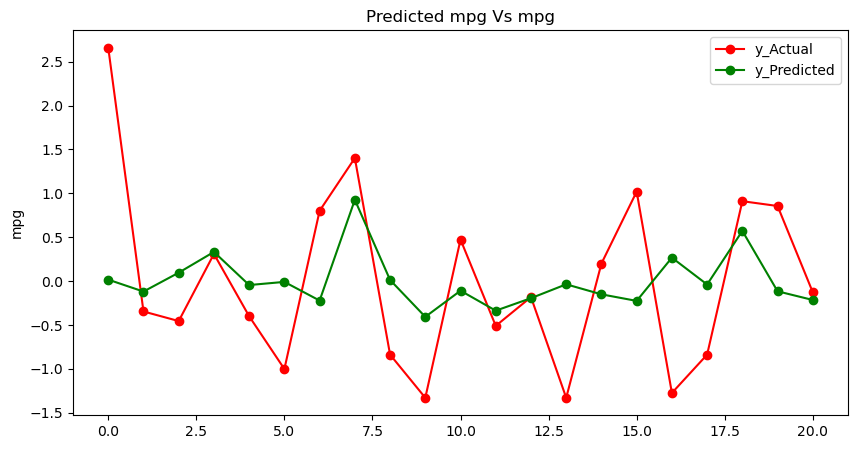

In [1453]:
#plot size
plt.figure(figsize = (10,5))
# to plot the line chart
plt.plot(y, color = 'red', marker = 'o', label = 'y_Actual')
plt.plot(y_predicted, color = 'green', marker = 'o', label = 'y_Predicted')
# labels
plt.ylabel("mpg")
plt.title("Predicted mpg Vs mpg")
# show labels
plt.legend()
plt.show()